## LOGISTIC REGRESSION

##### a. Load the dataset and perform exploratory data analysis (EDA)a.


In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv("Titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### This summary statistics has been applied on the categorical data also so we need to change the data types of some columns

In [6]:
titanic.shape

(891, 12)

##### b. Examine the features, their types, and summary statistics.

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# converting the data types of columns
titanic = titanic.astype({"PassengerId":"category","Survived":"category","Pclass":"category","Name":"category","Ticket":"category","Cabin":"category","Sex":"category","Embarked":"category"})
titanic.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [9]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [10]:
cat_cols = ['Pclass', 'Sex', 'Embarked']
num_cols = ['Age', 'SibSp', 'Parch']

##### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

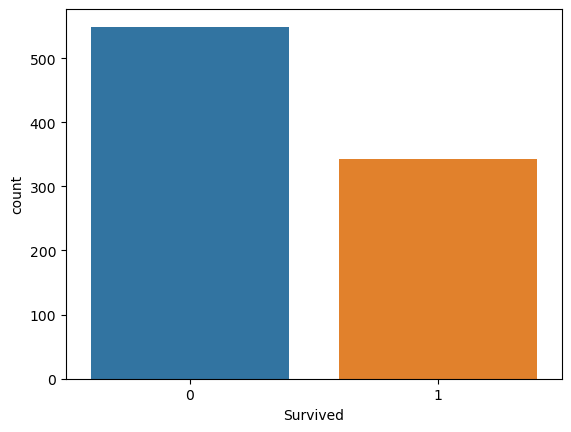

In [13]:
# countplot for survived(target variable)
import warnings
warnings.filterwarnings("ignore")
sns.countplot(x='Survived', data=titanic)
plt.show()

#### From the above plot we can say that persons died in titanic accident are more when comaperd to alive

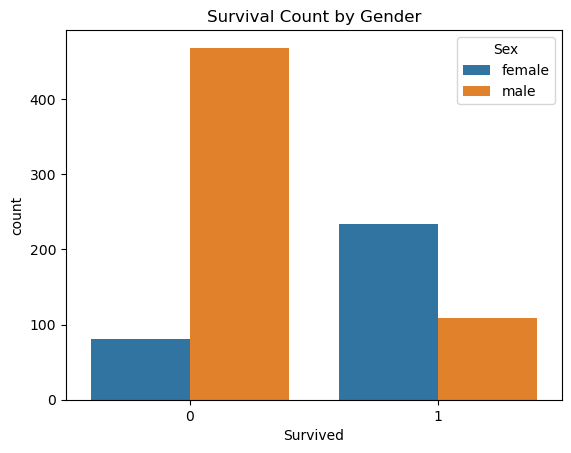

In [14]:
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival Count by Gender')
plt.show()

#### There were more female survivors (around 400) than male survivors (around 300) on the Titanic.
#### The number of female survivors is about 100 more than the number of male survivors.

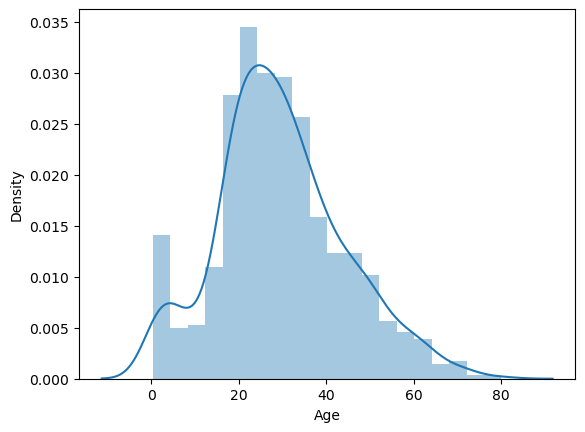

In [15]:
sns.distplot(titanic["Age"])
plt.show()

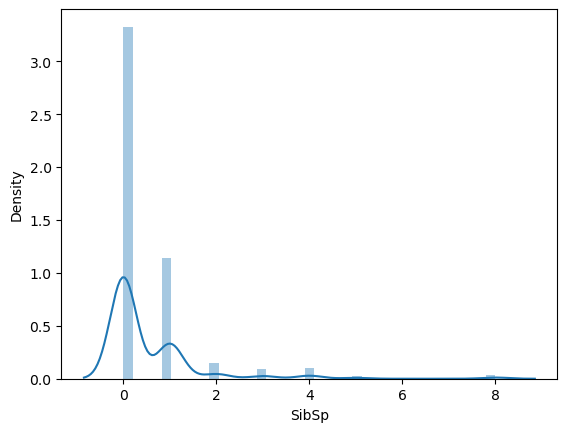

In [16]:
sns.distplot(titanic["SibSp"])
plt.show()

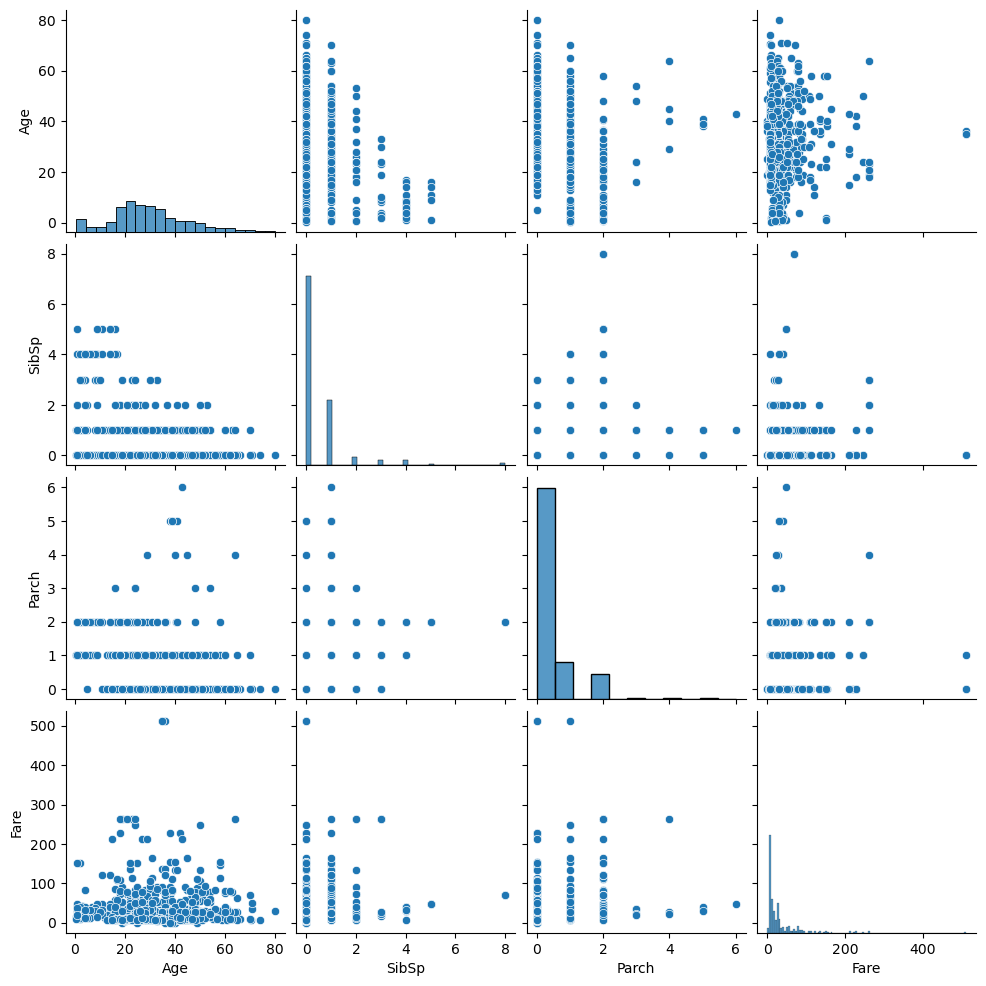

In [17]:
sns.pairplot(titanic)
plt.show()

##### Analyze any patterns or correlations observed in the data.

In [18]:
titanic[num_cols].corr()

,Age,SibSp,Parch
Age,1.000000,-0.308247,-0.189119
SibSp,-0.308247,1.000000,0.414838
Parch,-0.189119,0.414838,1.000000


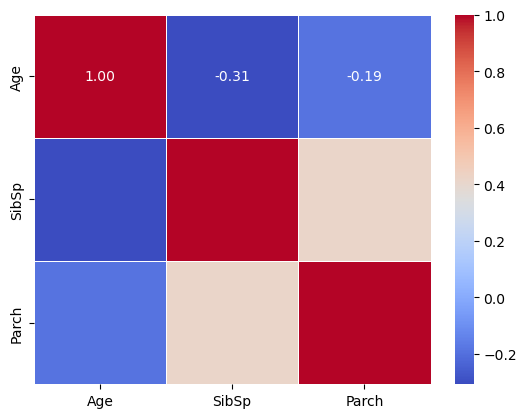

In [19]:
sns.heatmap(titanic[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


Correlation Matrix:
            Age     SibSp     Parch
Age    1.000000 -0.308247 -0.189119
SibSp -0.308247  1.000000  0.414838
Parch -0.189119  0.414838  1.000000


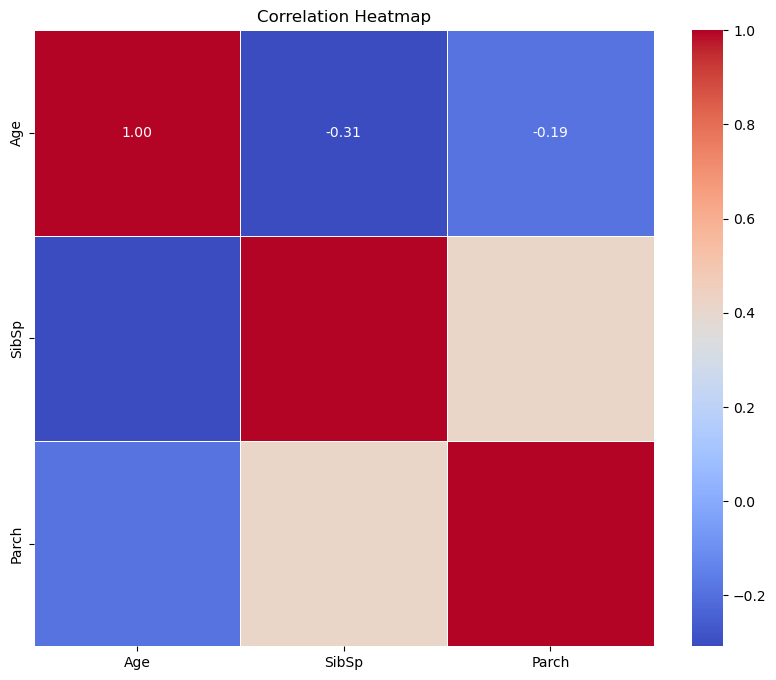

In [20]:
# Compute and display correlation matrix
correlation_matrix = titanic[num_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
titanic["Age"].median()

28.0

In [22]:
titanic["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: category
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [23]:
titanic["Embarked"].mode()

0    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [24]:
titanic["Age"] = titanic["Age"].fillna(28.0)
titanic["Cabin"] = titanic["Cabin"].fillna("G6")
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [25]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
X = titanic.drop(["Survived", "PassengerId", "Ticket", "Cabin", "Fare", "Name"], axis = 1)
y = titanic["Survived"]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,28.0,1,2,S
889,1,male,26.0,0,0,C


In [28]:
pd.DataFrame(y)

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 107)

In [30]:
print("X train : ", X_train.shape)
print("X test : ", X_test.shape)
print("y train : ", y_train.shape)
print("y test : ", y_test.shape)

X train :  (623, 6)
X test :  (268, 6)
y train :  (623,)
y test :  (268,)


In [31]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
502,3,female,28.00,0,0,Q
824,3,male,2.00,4,1,S
78,2,male,0.83,0,2,S
565,3,male,24.00,2,0,S
511,3,male,28.00,0,0,S
...,...,...,...,...,...,...
654,3,female,18.00,0,0,Q
454,3,male,28.00,0,0,S
473,2,female,23.00,0,0,C
176,3,male,28.00,3,1,S


In [32]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
44,3,female,19.0,0,0,Q
347,3,female,28.0,1,0,S
139,1,male,24.0,0,0,C
133,2,female,29.0,1,0,S
24,3,female,8.0,3,1,S
...,...,...,...,...,...,...
809,1,female,33.0,1,0,S
81,3,male,29.0,0,0,S
198,3,female,28.0,0,0,Q
73,3,male,26.0,1,0,C


In [33]:
y_train

502    0
824    0
78     1
565    0
511    0
      ..
654    0
454    0
473    1
176    0
62     0
Name: Survived, Length: 623, dtype: category
Categories (2, int64): [0, 1]

In [34]:
y_test

44     1
347    1
139    0
133    1
24     0
      ..
809    1
81     1
198    1
73     0
254    0
Name: Survived, Length: 268, dtype: category
Categories (2, int64): [0, 1]

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)

In [37]:
X_train_std

,Age,SibSp,Parch
0,-0.113671,-0.467485,-0.460310
1,-2.074688,3.095126,0.760002
2,-2.162933,-0.467485,1.980314
3,-0.415366,1.313820,-0.460310
4,-0.113671,-0.467485,-0.460310
...,...,...,...
618,-0.867908,-0.467485,-0.460310
619,-0.113671,-0.467485,-0.460310
620,-0.490789,-0.467485,-0.460310
621,-0.113671,2.204473,0.760002


In [38]:
X_test_std = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = X_test[num_cols].columns)

In [39]:
X_test_std

,Age,SibSp,Parch
0,-0.792484,-0.467485,-0.460310
1,-0.113671,0.423167,-0.460310
2,-0.415366,-0.467485,-0.460310
3,-0.038247,0.423167,-0.460310
4,-1.622145,2.204473,0.760002
...,...,...,...
263,0.263448,0.423167,-0.460310
264,-0.038247,-0.467485,-0.460310
265,-0.113671,-0.467485,-0.460310
266,-0.264518,0.423167,-0.460310


In [40]:
X_train_std = X_train_std.reset_index()
X_train_std

,index,Age,SibSp,Parch
0,0,-0.113671,-0.467485,-0.460310
1,1,-2.074688,3.095126,0.760002
2,2,-2.162933,-0.467485,1.980314
3,3,-0.415366,1.313820,-0.460310
4,4,-0.113671,-0.467485,-0.460310
...,...,...,...,...
618,618,-0.867908,-0.467485,-0.460310
619,619,-0.113671,-0.467485,-0.460310
620,620,-0.490789,-0.467485,-0.460310
621,621,-0.113671,2.204473,0.760002


In [41]:
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std

,Age,SibSp,Parch
0,-0.113671,-0.467485,-0.460310
1,-2.074688,3.095126,0.760002
2,-2.162933,-0.467485,1.980314
3,-0.415366,1.313820,-0.460310
4,-0.113671,-0.467485,-0.460310
...,...,...,...
618,-0.867908,-0.467485,-0.460310
619,-0.113671,-0.467485,-0.460310
620,-0.490789,-0.467485,-0.460310
621,-0.113671,2.204473,0.760002


In [42]:
X_test_std = X_test_std.reset_index()
X_test_std

,index,Age,SibSp,Parch
0,0,-0.792484,-0.467485,-0.460310
1,1,-0.113671,0.423167,-0.460310
2,2,-0.415366,-0.467485,-0.460310
3,3,-0.038247,0.423167,-0.460310
4,4,-1.622145,2.204473,0.760002
...,...,...,...,...
263,263,0.263448,0.423167,-0.460310
264,264,-0.038247,-0.467485,-0.460310
265,265,-0.113671,-0.467485,-0.460310
266,266,-0.264518,0.423167,-0.460310


In [43]:
X_test_std = X_test_std.drop(["index"], axis = 1)
X_test_std

,Age,SibSp,Parch
0,-0.792484,-0.467485,-0.460310
1,-0.113671,0.423167,-0.460310
2,-0.415366,-0.467485,-0.460310
3,-0.038247,0.423167,-0.460310
4,-1.622145,2.204473,0.760002
...,...,...,...
263,0.263448,0.423167,-0.460310
264,-0.038247,-0.467485,-0.460310
265,-0.113671,-0.467485,-0.460310
266,-0.264518,0.423167,-0.460310


In [44]:
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first = True).astype("int")
X_train_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
502,0,1,0,1,0
824,0,1,1,0,1
78,1,0,1,0,1
565,0,1,1,0,1
511,0,1,1,0,1
...,...,...,...,...,...
654,0,1,0,1,0
454,0,1,1,0,1
473,1,0,0,0,0
176,0,1,1,0,1


In [45]:
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,502,0,1,0,1,0
1,824,0,1,1,0,1
2,78,1,0,1,0,1
3,565,0,1,1,0,1
4,511,0,1,1,0,1
...,...,...,...,...,...,...
618,654,0,1,0,1,0
619,454,0,1,1,0,1
620,473,1,0,0,0,0
621,176,0,1,1,0,1


In [46]:
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
X_train_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,0,1,1,0,1
2,1,0,1,0,1
3,0,1,1,0,1
4,0,1,1,0,1
...,...,...,...,...,...
618,0,1,0,1,0
619,0,1,1,0,1
620,1,0,0,0,0
621,0,1,1,0,1


In [47]:
X_test_dummies = pd.get_dummies(X_test[cat_cols], drop_first = True).astype("int")

In [48]:
X_test_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
44,0,1,0,1,0
347,0,1,0,0,1
139,0,0,1,0,0
133,1,0,0,0,1
24,0,1,0,0,1
...,...,...,...,...,...
809,0,0,0,0,1
81,0,1,1,0,1
198,0,1,0,1,0
73,0,1,1,0,0


In [49]:
X_test_dummies = X_test_dummies.reset_index()
X_test_dummies

,index,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,44,0,1,0,1,0
1,347,0,1,0,0,1
2,139,0,0,1,0,0
3,133,1,0,0,0,1
4,24,0,1,0,0,1
...,...,...,...,...,...,...
263,809,0,0,0,0,1
264,81,0,1,1,0,1
265,198,0,1,0,1,0
266,73,0,1,1,0,0


In [50]:
X_test_dummies = X_test_dummies.drop(["index"], axis = 1)
X_test_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,0,1,0,0,1
2,0,0,1,0,0
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
263,0,0,0,0,1
264,0,1,1,0,1
265,0,1,0,1,0
266,0,1,1,0,0


In [51]:
final_X_train_data = pd.concat([X_train_std, X_train_dummies], axis = 1)
final_X_train_data

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.113671,-0.467485,-0.460310,0,1,0,1,0
1,-2.074688,3.095126,0.760002,0,1,1,0,1
2,-2.162933,-0.467485,1.980314,1,0,1,0,1
3,-0.415366,1.313820,-0.460310,0,1,1,0,1
4,-0.113671,-0.467485,-0.460310,0,1,1,0,1
...,...,...,...,...,...,...,...,...
618,-0.867908,-0.467485,-0.460310,0,1,0,1,0
619,-0.113671,-0.467485,-0.460310,0,1,1,0,1
620,-0.490789,-0.467485,-0.460310,1,0,0,0,0
621,-0.113671,2.204473,0.760002,0,1,1,0,1


In [52]:
final_X_train_data.isnull().sum()

Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [53]:
final_X_test_data = pd.concat([X_test_std, X_test_dummies], axis = 1)
final_X_test_data

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.792484,-0.467485,-0.460310,0,1,0,1,0
1,-0.113671,0.423167,-0.460310,0,1,0,0,1
2,-0.415366,-0.467485,-0.460310,0,0,1,0,0
3,-0.038247,0.423167,-0.460310,1,0,0,0,1
4,-1.622145,2.204473,0.760002,0,1,0,0,1
...,...,...,...,...,...,...,...,...
263,0.263448,0.423167,-0.460310,0,0,0,0,1
264,-0.038247,-0.467485,-0.460310,0,1,1,0,1
265,-0.113671,-0.467485,-0.460310,0,1,0,1,0
266,-0.264518,0.423167,-0.460310,0,1,1,0,0


In [54]:
final_X_test_data.isnull().sum()

Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Model Building:

#### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
lg_model_1 = LogisticRegression()
lg_model_1

LogisticRegression()

#### b. Train the model using the training data.

In [57]:
lg_model_1.fit(final_X_train_data, y_train)

LogisticRegression()

In [58]:
y_train_preds_1 = lg_model_1.predict(final_X_train_data)
y_train_preds_1

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [59]:
confusion_matrix = confusion_matrix(y_train, y_train_preds_1)
confusion_matrix

array([[348,  46],
       [ 71, 158]], dtype=int64)

In [60]:
accuracy_score(y_train_preds_1, y_train)

0.812199036918138

In [61]:
print(classification_report(y_train_preds_1, y_train))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       419
           1       0.69      0.77      0.73       204

    accuracy                           0.81       623
   macro avg       0.79      0.80      0.79       623
weighted avg       0.82      0.81      0.81       623



In [62]:
y_test_preds_1 = lg_model_1.predict(final_X_test_data)
y_test_preds_1

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0], dtype=int64)

### Model Evaluation:

#### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [63]:
accuracy_score(y_test_preds_1, y_test)

0.7985074626865671

In [64]:
# conf_matrix = confusion_matrix(y_test, y_test_preds_1)
# conf_matrix

In [65]:
print(classification_report(y_test_preds_1, y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       181
           1       0.65      0.84      0.73        87

    accuracy                           0.80       268
   macro avg       0.78      0.81      0.78       268
weighted avg       0.82      0.80      0.80       268



In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [67]:
lg_roc_score = roc_auc_score(y_test, y_test_preds_1)
lg_roc_score

0.7778475592349414

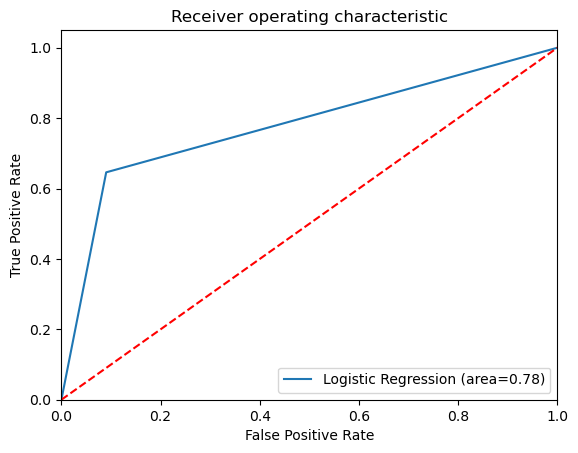

In [68]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_preds_1) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% lg_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 5. Interpretation:

#### a. Interpret the coefficients of the logistic regression model.

In [69]:
# Train the model
lg_model_2 = LogisticRegression()
lg_model_2.fit(final_X_train_data, y_train)

# Get coefficients
coefficients = lg_model_2.coef_

# Print coefficients
print(coefficients)

# Create a DataFrame for better visualization 
coef_df = pd.DataFrame(coefficients, columns=final_X_train_data.columns)
print(coef_df)

[[-0.46783808 -0.25688786 -0.1267492  -0.78394703 -2.20474028 -2.53563748
  -0.14181471 -0.38245296]]
        Age     SibSp     Parch  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0 -0.467838 -0.256888 -0.126749 -0.783947  -2.20474 -2.535637   -0.141815   

   Embarked_S  
0   -0.382453  


#### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

#### Interpreting the coefficients of a logistic regression model can be a bit tricky. In this case, you'll get an array of coefficients, one for each feature in your dataset.

#### Positive coefficients: A positive coefficient suggests that an increase in the corresponding feature value increases the probability of survival.
#### Negative coefficients: A negative coefficient suggests that an increase in the corresponding feature value decreases the probability of survival.
#### To discuss the significance of the features, you can look at the magnitude of the coefficients. Larger magnitude (either positive or negative) suggests a stronger influence on survival probability.

#### However, since you have standardized your numerical features, direct interpretation might be misleading. You can look at the coefficients of the dummy variables (like Sex_male, Embarked_Q, Embarked_S) to get a sense of their impact on survival. For example, if the coefficient for 'Sex_male' is negative and has a large magnitude, it suggests that being male significantly decreases the odds of survival.

In [70]:
from pickle import dump
from pickle import load

In [75]:
dump(lg_model_1, open('Logistic_Model.sav', 'wb'))

loaded_model=load(open('Logistic_Model.sav' ,'rb'))
result = loaded_model.score(final_X_train_data, y_train)
result

0.812199036918138


In [76]:
import os
os.getcwd()

'C:\\Users\\DILEEP\\ExcelR\\Assignments\\Logistic_Regression'